In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
adata = sc.read_csv('/vol/ExtraVol/MergedData_Preprocessed.csv')
adata = adata.T

In [4]:
anno = pd.read_csv('/vol/ExtraVol/MergedData_Preprocessed_Metadata.csv')

In [5]:
adata.obs = anno

In [6]:
adata

AnnData object with n_obs × n_vars = 64951 × 40879
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'percent.mt', 'CellName', 'doublet_finder', 'pANN', 'Doublet_classification', 'seurat_clusters'

In [7]:
adata.var_names

Index(['Gm26206', 'Xkr4', 'Gm53491', 'Rp1', 'Sox17', 'Gm22307', 'Gm37323',
       'Gm39586', 'Gm46082', 'Gm29874',
       ...
       'ND4', 'TrnH', 'TrnS2', 'TrnL2', 'ND5', 'ND6', 'TrnE', 'CYTB', 'TrnT',
       'TrnP'],
      dtype='object', length=40879)

In [8]:
adata.write_h5ad("/vol/ExtraVol/MergedData_Preprocessed.h5ad") 

In [ ]:
### FINISH HERE ###

--> added 'pos', the PAGA positions (adata.uns['paga'])


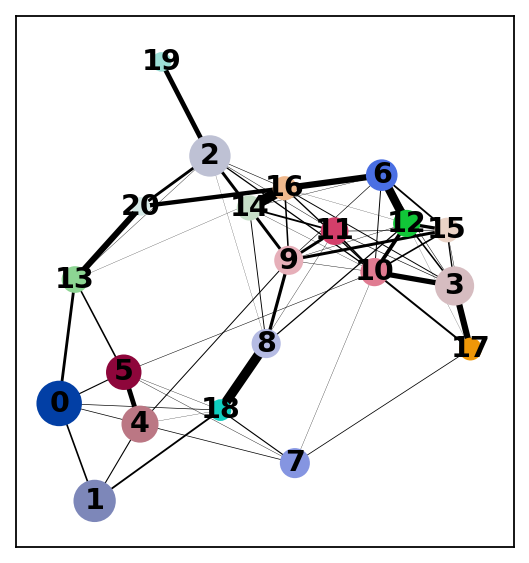

In [19]:
sc.pl.paga(adata, color=['leiden'])

In [20]:
adata.uns['iroot'] = np.flatnonzero((adata.obs['stage'] == 'embryonic'))[0]

In [21]:
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9990545  0.99723136 0.9964495  0.99569386 0.9954111
     0.99525577 0.99390596 0.9907364  0.9902772  0.9891659  0.9887005
     0.987652   0.9874786  0.9864071 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


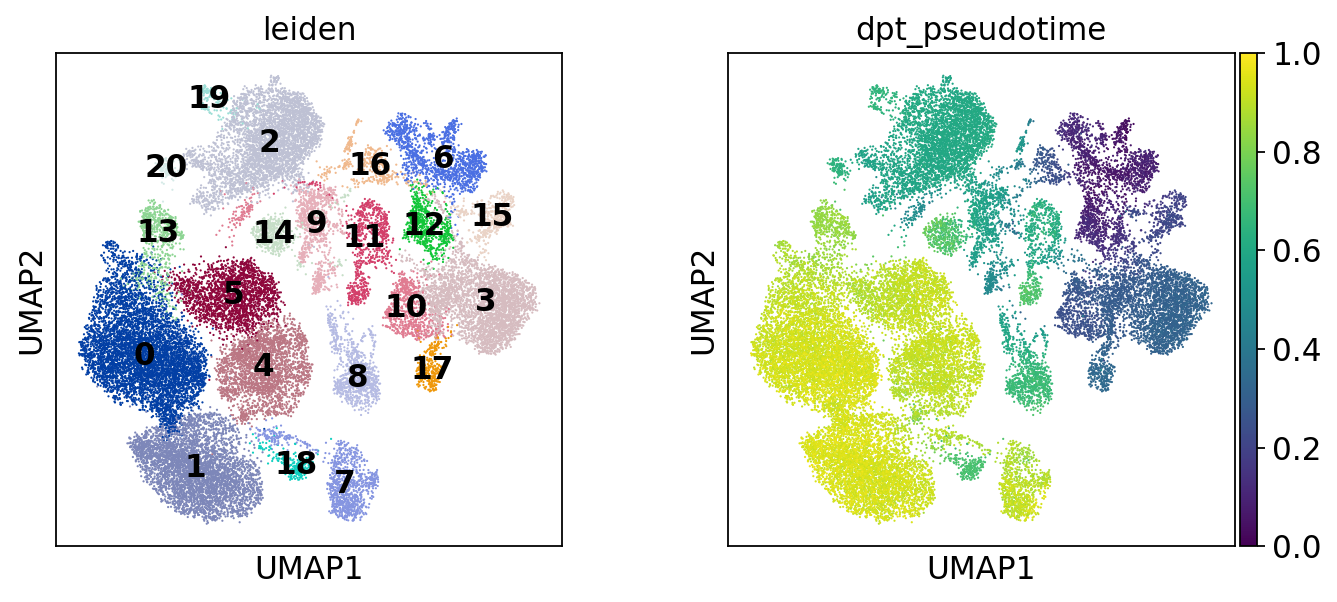

In [22]:
sc.pl.umap(adata, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:57)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

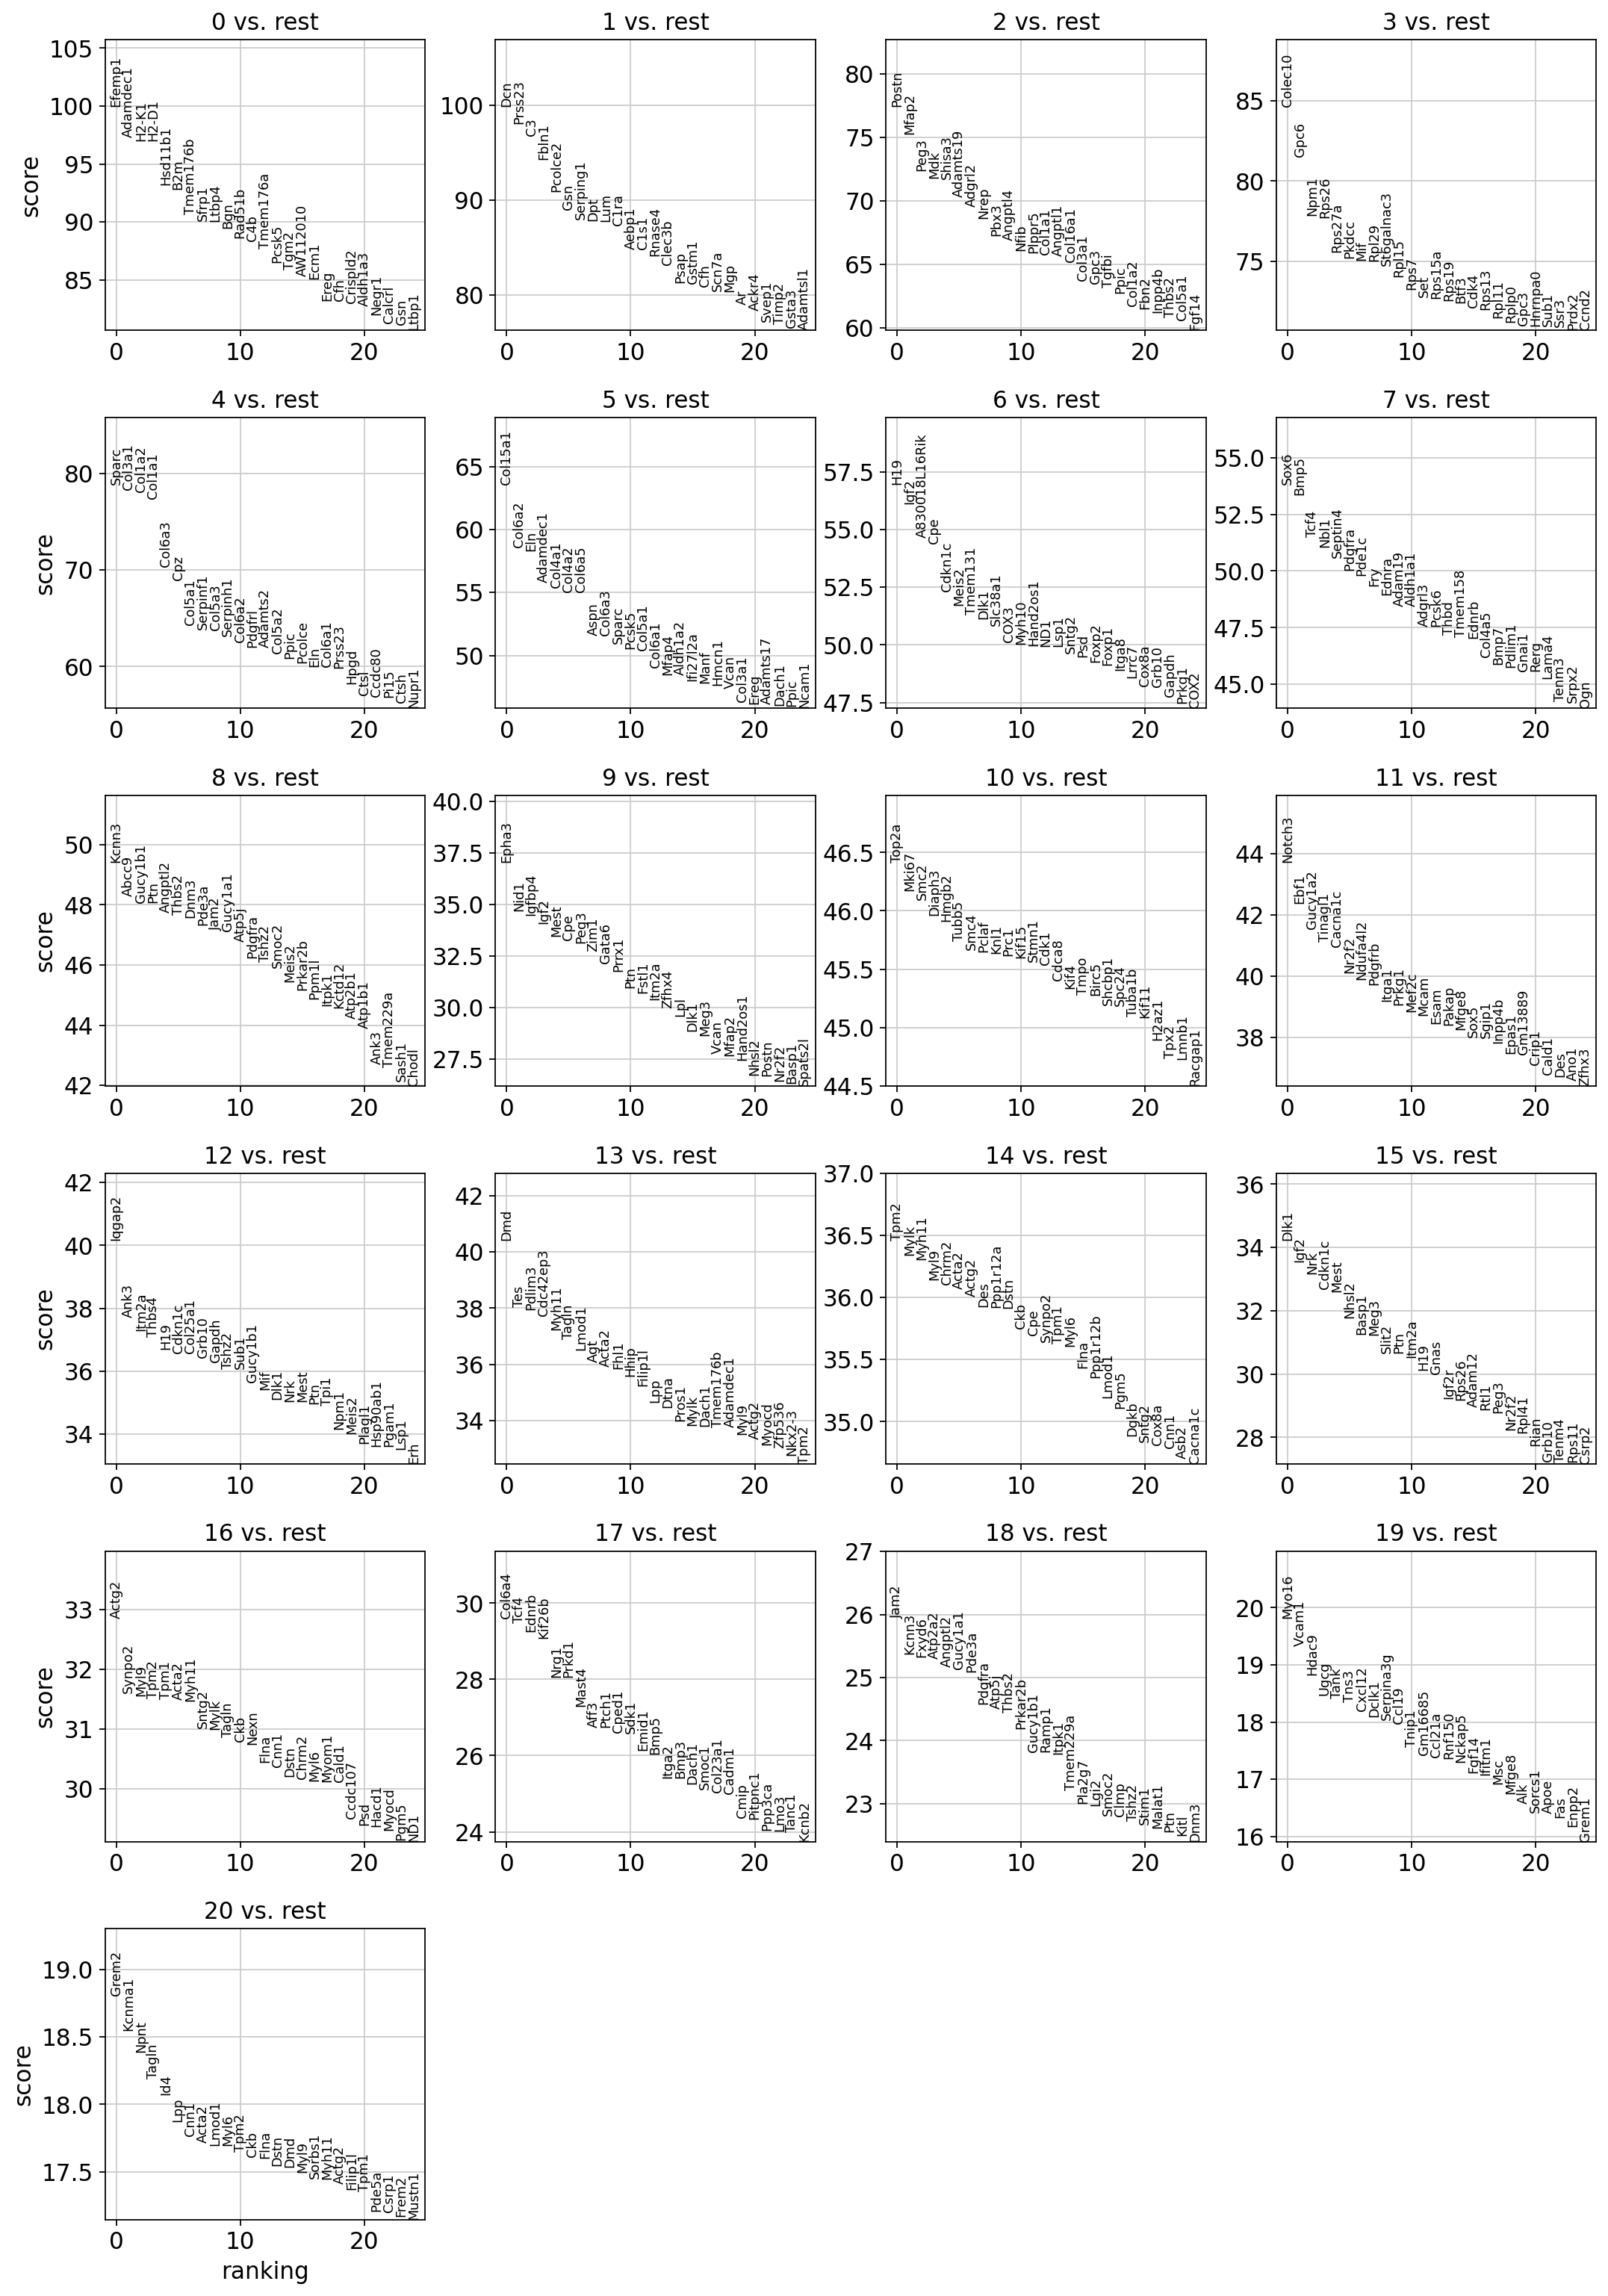

In [23]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


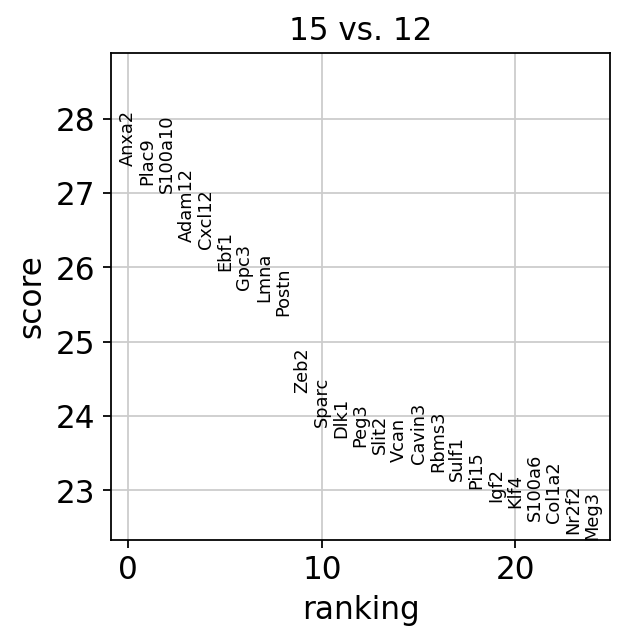

In [24]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False, groups = ['15'], reference = '12',)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [25]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adamdec1+_adult_fibroblasts'])

# Define the clusters of interest
clusters_of_interest = {'0'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adamdec1+_adult_fibroblasts'

In [26]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Ogn+_adult_fibroblasts'])

# Define the clusters of interest
clusters_of_interest = {'1'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Ogn+_adult_fibroblasts'

In [27]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Jam2+_cells'])

# Define the clusters of interest
clusters_of_interest = {'18'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Jam2+_cells'

In [28]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Sox6+Bmp5+Tcf4+_adult_fibroblasts'])

# Define the clusters of interest
clusters_of_interest = {'7'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Sox6+Bmp5+Tcf4+_adult_fibroblasts'

In [29]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adamdec1+_AW_fibroblasts'])

# Define the clusters of interest
clusters_of_interest = {'5'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adamdec1+_AW_fibroblasts'

In [30]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Ogn+_AW_fibroblasts'])

# Define the clusters of interest
clusters_of_interest = {'4'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Ogn+_AW_fibroblasts'

In [31]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Ncam1+_newborn_cells'])

# Define the clusters of interest
clusters_of_interest = {'2'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Ncam1+_newborn_cells'

In [32]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Jam2+_newborn_cells'])

# Define the clusters of interest
clusters_of_interest = {'8'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Jam2+_newborn_cells'

In [34]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Igf2+_newborn_cells'])

# Define the clusters of interest
clusters_of_interest = {'9'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Igf2+_newborn_cells'

In [35]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Colec10+_embryonic_cells'])

# Define the clusters of interest
clusters_of_interest = {'3', '10'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Colec10+_embryonic_cells'

In [36]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Sox6+Bmp5+Tcf4+_embryonic_cells'])

# Define the clusters of interest
clusters_of_interest = {'17'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Sox6+Bmp5+Tcf4+_embryonic_cells'

In [37]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Igf2+_embryonic_cells'])

# Define the clusters of interest
clusters_of_interest = {'6','12','15'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Igf2+_embryonic_cells'

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


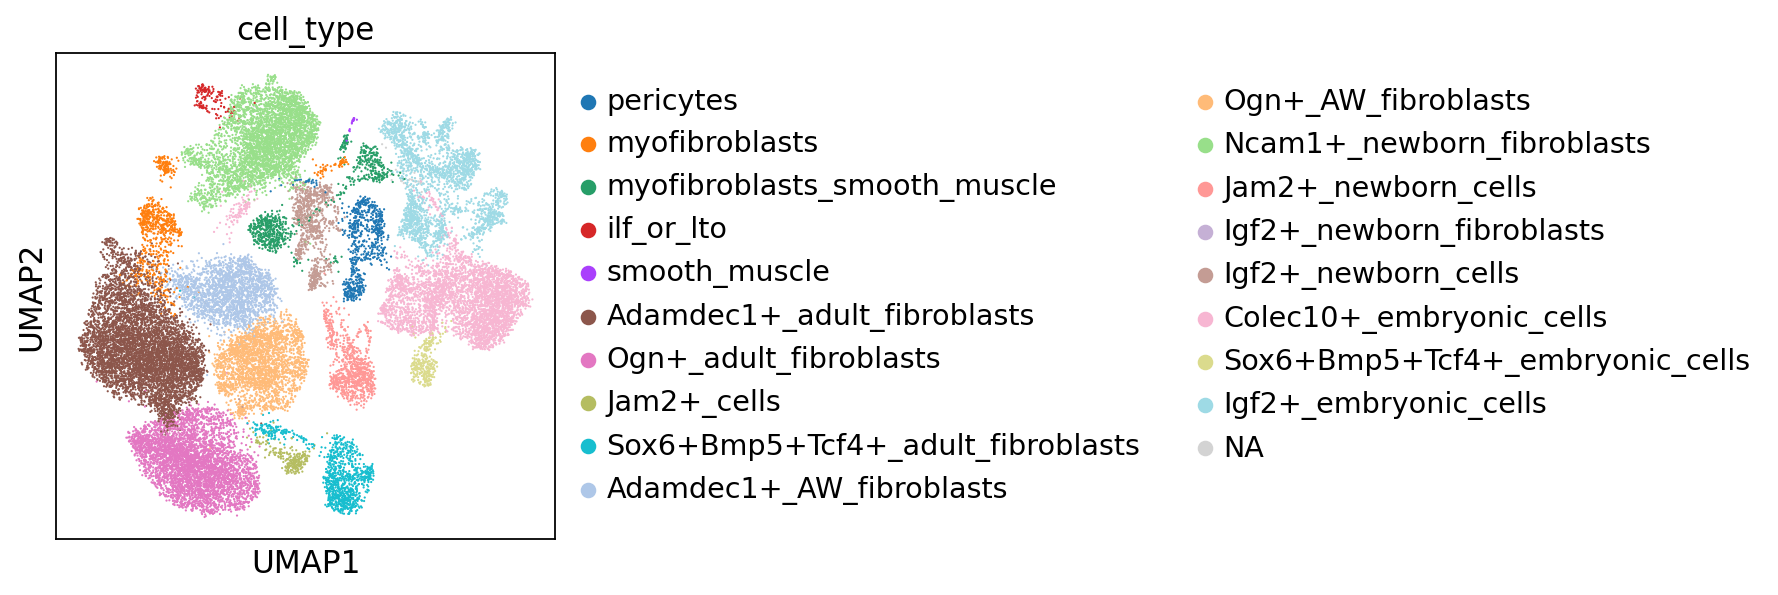

In [38]:
sc.pl.umap(adata, color=['cell_type'])

In [39]:
adata.write_h5ad("/vol/ExtraVol/Development_CellTypeAssigned.h5ad") 